In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

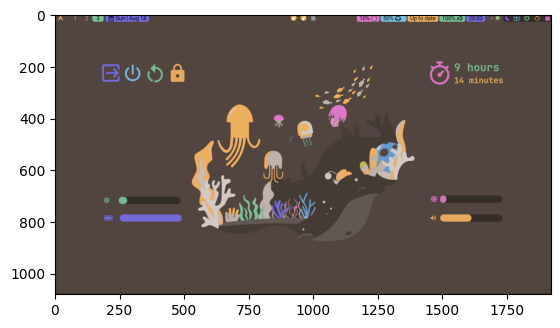

In [3]:
img = cv2.imread('./images/rice1.png')
plt.imshow(img) # shows in BGR, convert to RGB

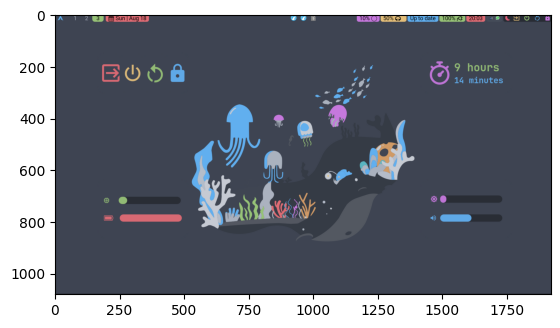

In [4]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [5]:
img2 = img.reshape((img.shape[1] * img.shape[0], 3))

In [6]:
kmeans = KMeans(n_clusters = 5) # arbitrary number of clusters
s = kmeans.fit(img2)

In [7]:
labels = kmeans.labels_
print(labels)
labels = list(labels)

[0 0 0 ... 0 0 0]


In [8]:
centroid = kmeans.cluster_centers_
print(centroid)

[[ 61.62096295  67.57234278  81.20926697]
 [186.28936917 175.57069414 204.39866132]
 [ 95.92147034 171.85244361 233.41812865]
 [213.08235656 116.06027481 112.37402871]
 [163.01328573 182.57327637 120.65726326]]


In [9]:
percent = []
for i in range(len(centroid)):
    j = labels.count(i)
    j /= len(labels)
    percent.append(j)
print(percent)

[0.9337644675925926, 0.023914930555555554, 0.02309027777777778, 0.010985243055555555, 0.008245081018518518]


In [10]:
def rgb_to_hex(rgb):
    return '#{:02x}{:02x}{:02x}'.format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
hex_colors = [rgb_to_hex(color) for color in centroid]

([<matplotlib.patches.Wedge at 0x7d63fdca0a70>,
 [Text(-1.0762711602496287, 0.2272452191244478, '#3d4351'),
  Text(1.0366484278299095, -0.3679130835914606, '#baafcc'),
  Text(1.079498894736368, -0.21138149460858685, '#5fabe9'),
  Text(1.0959047560744015, -0.09483019357518307, '#d57470'),
  Text(1.099631015401007, -0.028489120171574286, '#a3b678')])

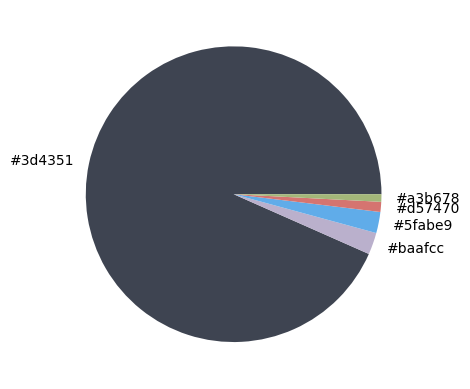

In [11]:
hex_colors = [rgb_to_hex(color) for color in centroid]
plt.pie(percent, colors=np.array(centroid/255), labels=hex_colors)

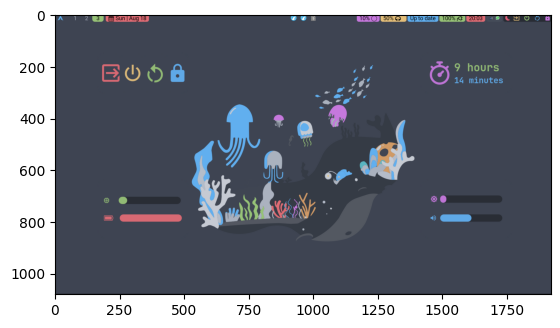

In [12]:
plt.imshow(img)

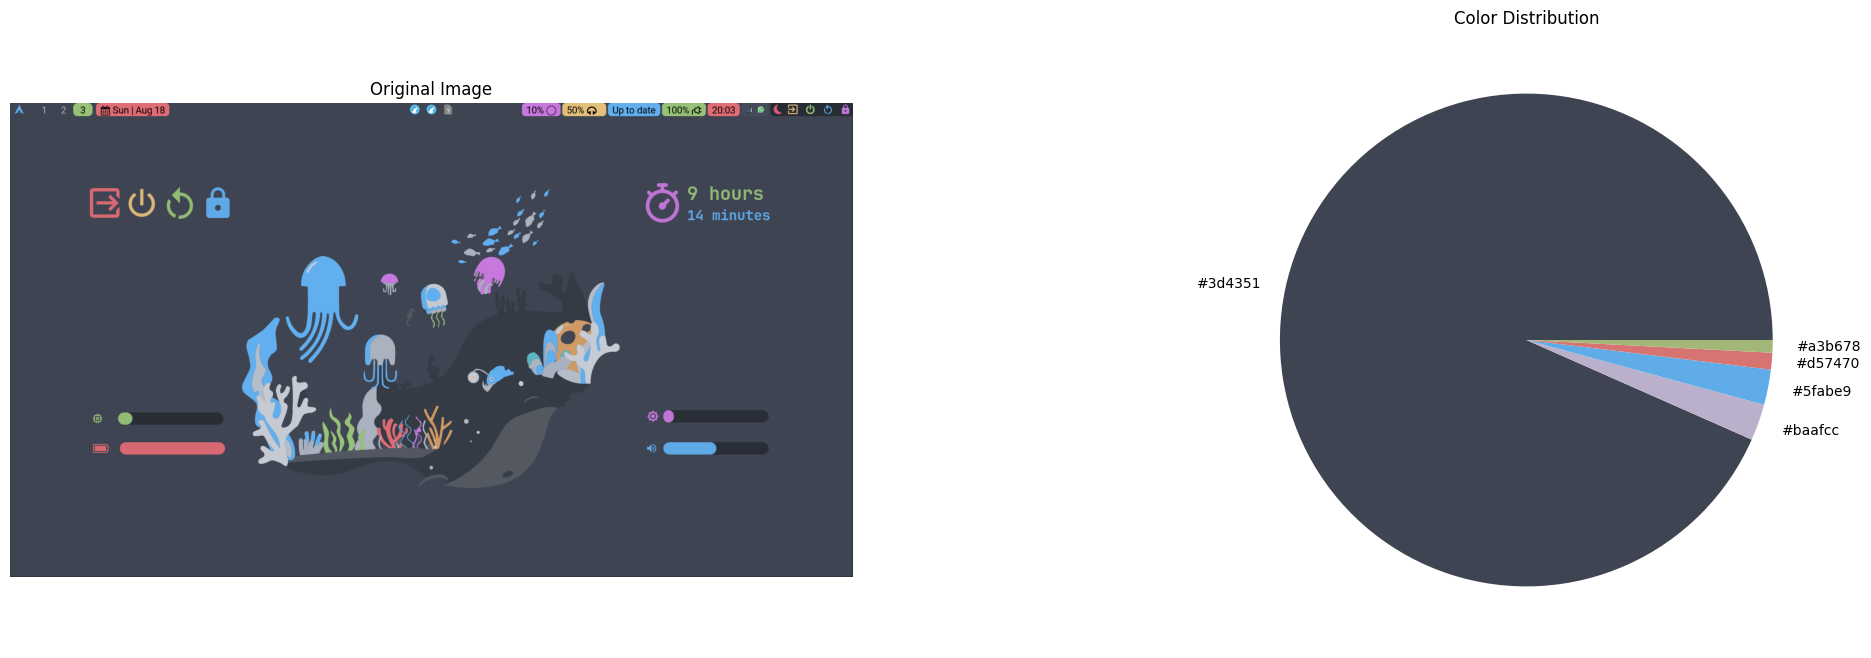

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(25, 8))  # Adjust figure size

# Left Subplot: Display the original image using imshow
ax[0].imshow(img)
ax[0].axis('off')  # Hide the axes for the image
ax[0].set_title("Original Image")

# Right Subplot: Display the pie chart
ax[1].pie(percent, colors=np.array(centroid / 255), labels=hex_colors, wedgeprops=dict(width=1))
ax[1].set_title("Color Distribution")

# Adjust the layout
plt.subplots_adjust(wspace=0.3)  # Add space between subplots
plt.show()
